<a href="https://colab.research.google.com/github/JuanDaGue/Rlativity-/blob/main/Proyecto_final_metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [ ]:
"""Proyecto final de metodos """
#1)
#regla de simpson compuesta
def simpson(g,a,b,n):
    if(n%2==0): #n es par?
        n=n+1 #convierte a impar el n
    s1=0 #para hacer sumas
    h=(b-a)/n #ancho del intervalo
    for i in range(1,n,2):
        s1=s1+g(a+i*h)
    return 4*h*s1/3+2*h*s1/3+h*(g(a)+g(b))/3

In [ ]:
"""integrando el brillo superficial de la alaxia"""
def I(lam):
    return np.interp(lam,x,y) 
M=np.zeros((72,78))
for i in range(0,72):
    for j in range(0,78):
        m=('spectra_{}_{}.dat'.format(i, j))
        R=np.loadtxt(('spectra_{}_{}.dat'.format(i, j)))
        x=R[:,0]
        y=R[:,1]
        def I(lam):
            return np.interp(lam,x,y) 
        SO=simpson(I,3749,7501,1000)
        
        M[i][j]=SO

In [ ]:
plt.imshow(M)
plt.title("Brillo superficial de la galaxia")

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [ ]:
"""4 RGB"""
#esta parte muestra como se selecionan los rangos de lamda en r g y b para un solo pixel
#primer pixel Rojo
lam1=np.loadtxt("spectra_38_37.dat")
lmaz=lam1
lmv=lam1
lmr=lam1[lam1[:,0]>5800] 
xr=lmr[lmr[:,0]<7500]
#primer pixel azul
lmaz[lmaz[:,0]>3750] 
xb=lmaz[lmaz[:,0]<4900]
#primer pixel verde
lmv[lmv [:,0]>4900] 
xg=lmv[lmv[:,0] <5800]
#Calulando la integral
r=xr[:,0]
b=xb[:,0]
g=xg[:,0]
yr=xr[:,1]
yb=xb[:,1]
yg=xg[:,1]
def Ir(lam):
    return np.interp(lam,r,yr) 
def Ib(lam):
    return np.interp(lam,b,yb)
def Ig(lam):
    return np.interp(lam,g,yg)

Sr=simpson(Ir,5800,7500,100)
Sb=simpson(Ib,3750,4900,100)
Sg=simpson(Ig,4900,5800,100)

In [ ]:
Sb,Sg,Sr

(183.43445838643245, 190.6541951769436, 363.3428337091134)

In [ ]:
"""realizando matrices de RGB"""
#matrices para guardar el brillo superficial de cada pixel en RGB
Mr=np.zeros((72,78))
Mb=np.zeros((72,78))
Mg=np.zeros((72,78))
#matrices para guardar el brillo superficial normalizado de cada pixel
"""
Cr=np.zeros((72,78))
Cb=np.zeros((72,78))
Cg=np.zeros((72,78))
"""
for i in range(0,72):
    for j in range(0,78):
        lam1=np.loadtxt(('spectra_{}_{}.dat'.format(i, j)))#los dat van cambiando con i y j
        lmaz=lam1
        lmv=lam1
        lmr=lam1[lam1[:,0]>5800] 
        xr=lmr[lmr[:,0]<7500]
        #primer pixel azul
        lmaz[lmaz[:,0]>3750] 
        xb=lmaz[lmaz[:,0]<4900]
        #primer pixel verde
        lmv[lmv [:,0]>4900] 
        xg=lmv[lmv[:,0] <5800]
        #Calulando la integral
        r=xr[:,0]
        b=xb[:,0]
        g=xg[:,0]
        yr=xr[:,1]
        yb=xb[:,1]
        yg=xg[:,1]
        def Ir(lam):
            return np.interp(lam,r,yr) 
        def Ib(lam):
            return np.interp(lam,b,yb)
        def Ig(lam):
            return np.interp(lam,g,yg)

        Sr=simpson(Ir,5800,7500,100)
        Sb=simpson(Ib,3750,4900,100)
        Sg=simpson(Ig,4900,5800,100)
        Mr[i][j]=Sr#guandando cada resultado de cada iteraccion en las matrices
        Mb[i][j]=Sb
        Mg[i][j]=Sg
        
        """Normalizando cada matriz"""
#creo que esto no era necesario
"""
        Cr[i][j]=Sr/np.max(Sr)#guandando cada resultado de cada iteraccion en las matrices
        Cb[i][j]=Sb/np.max(Sb)
        Cg[i][j]=Sg/np.max(Sg)
"""     

'\n        Cr[i][j]=Sr/np.max(Sr)#guandando cada resultado de cada iteraccion en las matrices\n        Cb[i][j]=Sb/np.max(Sb)\n        Cg[i][j]=Sg/np.max(Sg)\n'

In [ ]:
"""Normalizar"""
Cr=Mr/np.max(Mr)#guandando cada resultado de cada iteraccion en las matrices
Cb=Mb/np.max(Mb)
Cg=Mg/np.max(Mg)


array([ -1.04302304e-04,  -8.92752283e-05,   2.50129728e-04,
         2.28752048e-03,   3.28640891e-03,   3.79393175e-03,
         4.65988005e-03,   6.12910696e-03,   8.06322661e-03,
         1.03268171e-02,   1.21988057e-02,   1.41084897e-02,
         1.67638370e-02,   1.83791667e-02,   1.91551505e-02,
         2.04989454e-02,   2.18530343e-02,   2.29759006e-02,
         2.42530599e-02,   2.47900538e-02,   2.60085355e-02,
         3.01256952e-02,   3.43973889e-02,   3.83146111e-02,
         4.48357448e-02,   5.03279989e-02,   5.41142281e-02,
         6.02499488e-02,   6.49906259e-02,   6.71732106e-02,
         6.78343894e-02,   6.47768167e-02,   6.24456133e-02,
         6.30173963e-02,   6.63060548e-02,   6.96833946e-02,
         7.33252433e-02,   7.39963741e-02,   7.27861204e-02,
         7.11079632e-02,   7.05339343e-02,   7.01886265e-02,
         6.78957970e-02,   6.36415076e-02,   6.01763449e-02,
         5.59878975e-02,   5.30229223e-02,   5.25291721e-02,
         5.22068585e-02,

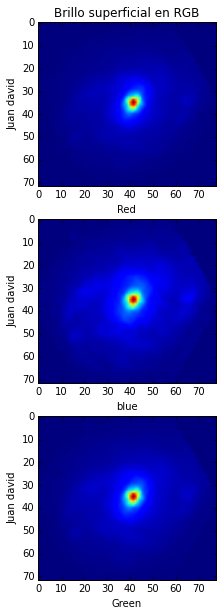

In [ ]:

"""construyendo las graficas"""
plt.figure( figsize=(12,10) )
plt.subplot(3, 1, 1)
plt.imshow(Cr)
plt.xlabel('Red')
plt.ylabel('Juan david')
plt.title("Brillo superficial en RGB")
plt.subplot(3, 1, 2)
plt.imshow(Cb)
plt.xlabel('blue')
plt.ylabel('Juan david')
plt.subplot(3, 1, 3)
plt.imshow(Cg)
plt.xlabel('Green')
plt.ylabel('Juan david')




In [ ]:
"""Emision alpha"""
x=[]
y=[]
for i in range(0,72):
    for j in range(0,78):
        R=np.loadtxt(('spectra_{}_{}.dat'.format(i, j)))
        x.append(np.average(R[:,0]))
        y.append(np.average(R[:,1]))
plt.plot(x,y)

In [ ]:
from scipy import linalg as lg

In [ ]:

#Matrice M#
n=10
M = []
m=np.linspace(100,200,n)
k=np.linspace(10,19,n)
for i in range(0,n):
    M.append([])
    for j in range(0,n):
        if (i==j and i != (n)-1):
            M[i].append((k[i+1]+k[i])/m[i])
        if (j==(i-1)):
            M[i].append((-k[i])/m[i])
        if (j==(i+1)):
            M[i].append((-k[i+1])/m[i])
        else:
            M[i].append(0)

In [ ]:
M = np.matrix(M)
#A=np.linalg.eig(M)[1]
#A1=np.linalg.eig(M)[0]
"""Esta matris no quiso funcionar con el comando eig"""


'Esta matris no quiso funcionar con el comando eig'

In [ ]:
"""Actividad final """
n=10
M = np.zeros((n,n))
t=np.linspace(0,30,n)#posicion de los osciladores
m=1#masas 
k=np.linspace(10,19,n)#constante elasticas
for i in range(0,n):
    for j in range(0,n):
        if (j==i and i != 9):
            M[i][j]=(k[i+1]+k[i])/m
        if  j==(i-1):
            M[i][j]=(-k[i])/m
        if  j==(i+1):
            M[i][j]=(-k[i+1])/m

In [ ]:
np.matrix(M)

matrix([[ 21., -11.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [-11.,  23., -12.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0., -12.,  25., -13.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0., -13.,  27., -14.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., -14.,  29., -15.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0., -15.,  31., -16.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., -16.,  33., -17.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., -17.,  35., -18.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0., -18.,  37., -19.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -19.,   0.]])

In [ ]:
#Calculando los valores y vectores propios
A=np.linalg.eig(M)[1]
A1=np.linalg.eig(M)[0]

C:\Users\Juan_2\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


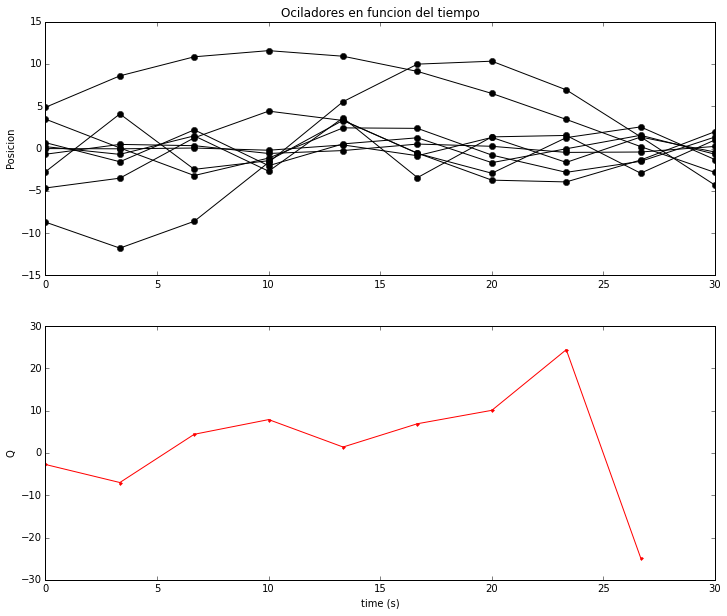

In [ ]:
t=np.linspace(0,30,n)#posicion de los osciladores
c=np.linspace(5,30,n)#arreglo de constantes
s=np.linspace(10,30,n)#arreglo de constantes
def q(t,c,s):
    return c*np.sin(np.sqrt(A1)*t+s)
x=A*q(t,c,s)#la posicion con respecto al tiempo
q=q(t,c,s)
plt.figure( figsize=(12,10) )
plt.subplot(2, 1, 1)
plt.plot(t,x, 'ko-')
plt.title('Ociladores en funcion del tiempo')
plt.ylabel('Posicion')

plt.subplot(2, 1, 2)
plt.plot(t,q, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Q')

In [ ]:
"""como cada cuerpo esta conectado a un oscilador de constante k el grafico da asi"""